<a href="https://colab.research.google.com/github/albarrazikrillah14/PCD-PRAKTIKUM/blob/main/PCD2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import library atau packages
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
#membaca sebuah citra, dari gambar yang sudah disimpan di google drive
gambar = cv2.imread("/content/drive/MyDrive/PCD/02/lenna.png")

In [ ]:
#membuat matrix untuk canvas
baris, kolom, k = gambar.shape
kanvas = np.zeros((baris, kolom, k), np.uint8)

In [ ]:
#ubah citra menjadi HSV Color space
for i in range(0, baris):
  for j in range(0, kolom):
    b = gambar[i, j, 0] / 255
    g = gambar[i, j, 1] / 255
    r = gambar[i, j, 2] / 255

    v = max(r, g, b)

    if(v != 0):
      s = (v - min(r, g, b)) / v
    else:
      s = 0
    
    if v == r:
      h = 60*(g - b) / (v - min(r, g, b))
    elif v == g:
      h = 120 + 60 * (b -r) / (v - min(r, g, b))
    elif v == b:
      h = 240 + 60 *(r - b) / (v - min(r, g, b))
    elif  r == g and g == b:
      h = 0
    
    if h < 0:
      h = h + 360

    kanvas[i, j, 0] = h / 2
    kanvas[i, j, 1] = s * 255
    kanvas[i, j, 2] = v *255

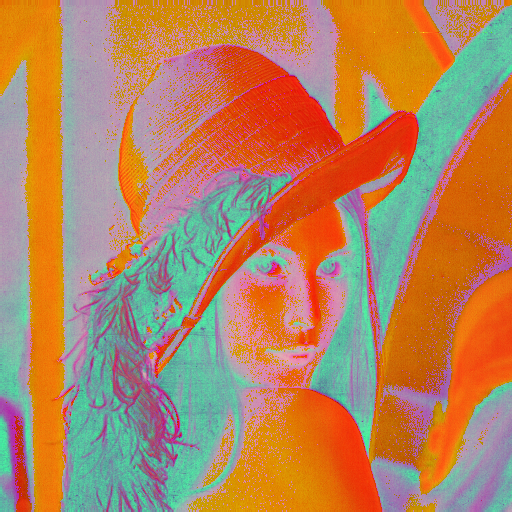

In [ ]:
cv2_imshow(kanvas)

In [ ]:
#split citra menggunakan cv.split
H, S, V = cv2.split(kanvas)

In [ ]:
#rata rata H, V, S
sumH = 0
sumS = 0
sumV = 0
count = baris * kolom
for i in range(0, baris):
  for j in range(0, kolom):
    sumH = sumH + H[i,j]
    sumS = sumS + S[i, j]
    sumV = sumV + V[i, j]

avgH = sumH / count
avgS = sumS / count
avgV = sumV / count

In [ ]:
#thresholding tiap channel

for i in range(0, baris):
  for j in range(0, kolom):
    if H[i, j] < avgH:
      H[i, j] = 0
    else:
      H[i, j] = 255
    
    if S[i, j] < avgS:
      S[i, j] = 0
    else:
      S[i, j] = 255

    if V[i, j] < avgV:
      V[i, j] = 0
    else:
      V[i, j] = 255

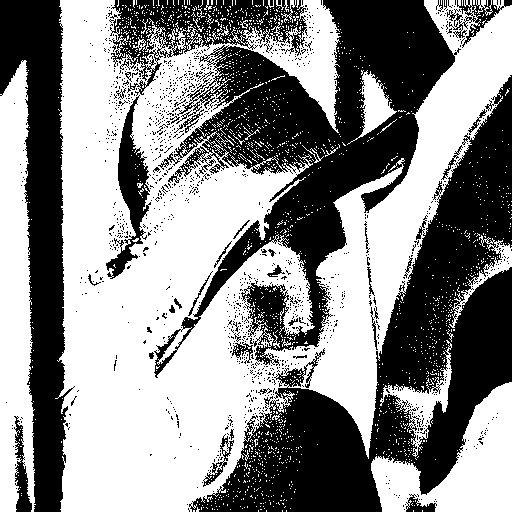

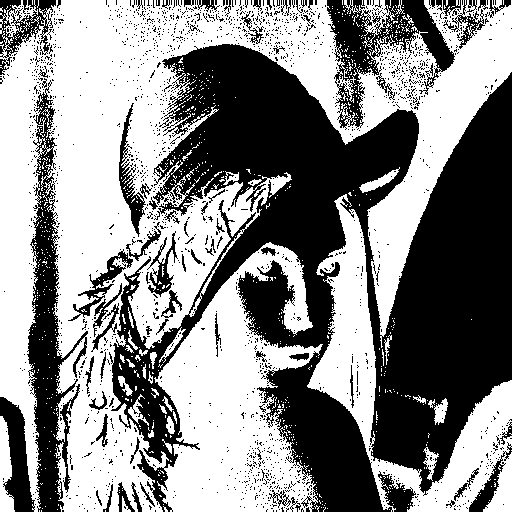

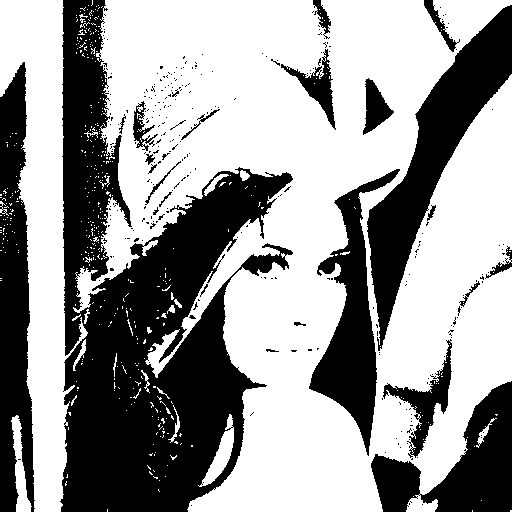

In [ ]:
#tampilkan hasil

cv2_imshow(H)
cv2_imshow(S)
cv2_imshow(V)